In [1]:
import pandas as pd
df_data_1 = pd.read_csv("mainSimulationAccessTraces.csv")

In [2]:
import numpy as np
df_data_1['accessedNodeType'] = df_data_1['accessedNodeType'].fillna(value='/Malicious')

In [3]:
df_data_1.loc[df_data_1.value=='twenty',"value"] = '20.0'
df_data_1.loc[df_data_1.value=='false',"value"] = '0'
df_data_1.loc[df_data_1.value=='true',"value"] = '1'
df_data_1.loc[df_data_1.value=='none',"value"] = '0'
df_data_1.loc[df_data_1.value=='0',"value"] = '0.0'
df_data_1['value'] = df_data_1['value'].fillna(value='60.0')
df_data_1 = df_data_1.drop(df_data_1.index[df_data_1.value.str.contains("org.*")])
df_data_1.value = df_data_1.value.astype(float)

In [4]:
df_data_1.head()

sourceID          sourceAddress       sourceType   sourceLocation  \
0  lightcontrol2  /agent2/lightcontrol2  /lightControler   BedroomParents   
1  lightcontrol3  /agent3/lightcontrol3  /lightControler      Dinningroom   
2  lightcontrol1  /agent1/lightcontrol1  /lightControler  BedroomChildren   
3  lightcontrol4  /agent4/lightcontrol4  /lightControler          Kitchen   
4      movement4      /agent4/movement4  /movementSensor          Kitchen   

  destinationServiceAddress destinationServiceType destinationLocation  \
0     /agent2/lightcontrol2        /lightControler      BedroomParents   
1     /agent3/lightcontrol3        /lightControler         Dinningroom   
2     /agent1/lightcontrol1        /lightControler     BedroomChildren   
3     /agent4/lightcontrol4        /lightControler             Kitchen   
4         /agent4/movement4        /movementSensor             Kitchen   

     accessedNodeAddress accessedNodeType        operation  value  \
0  /agent2/lightcontrol2  /lightControler  registerService    0.0   
1  /agent3/lightcontrol3  /lightControler  registerService    0.0   
2  /agent1/lightcontrol1  /lightControler  registerService    0.0   
3  /agent4/lightcontrol4  /lightControler  registerService    0.0   
4      /agent4/movement4  /movementSensor  registerService    0.0   

       timestamp normality  
0  1520031600000    normal  
1  1520031603269    normal  
2  1520031603279    normal  
3  1520031603290    normal  
4  1520031603464    normal

In [6]:
import matplotlib.pyplot as plt
import random
import numpy as np

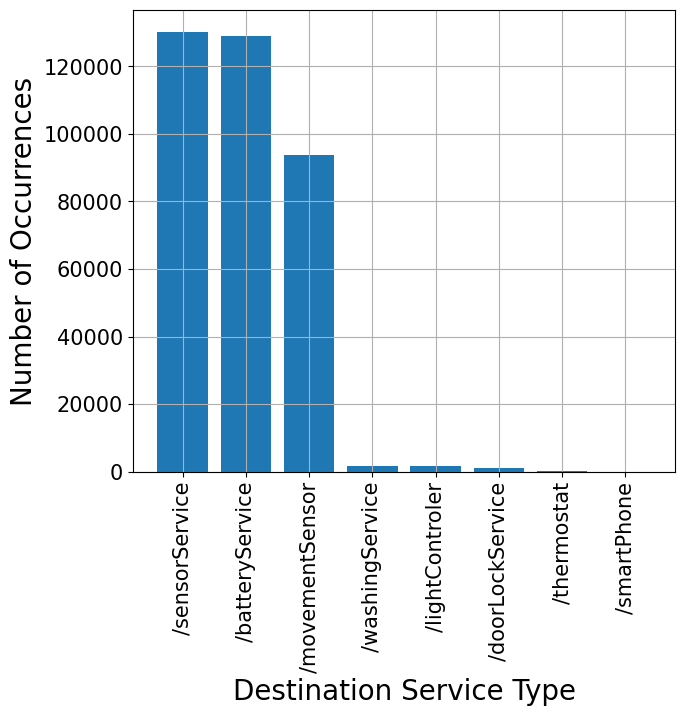

In [7]:
destination_type_count = df_data_1.destinationServiceType.value_counts()
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
plt.grid()
plt.bar(destination_type_count.index, destination_type_count.values)
plt.ylabel('Number of Occurrences', fontsize=20)
plt.xlabel('Destination Service Type', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [8]:
df_1 = df_data_1.drop('timestamp',axis=1)

In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder0 = LabelEncoder()
labelencoder1 = LabelEncoder()
labelencoder4 = LabelEncoder()
labelencoder7 = LabelEncoder()
labelencodery = LabelEncoder()

In [10]:
X_0 = df_1.iloc[:,0].values
X_1 = df_1.iloc[:,1].values
X_4 = df_1.iloc[:,4].values
X_7 = df_1.iloc[:,7].values
y = df_1.iloc[:,11].values

In [11]:
X_0 = labelencoder0.fit_transform(X_0)
X_0 = X_0.reshape(len(X_0),1)
X_1 = labelencoder1.fit_transform(X_1)
X_1 = X_1.reshape(len(X_1),1)
X_4 = labelencoder4.fit_transform(X_4)
X_4 = X_4.reshape(len(X_4),1)
X_7 = labelencoder7.fit_transform(X_7)
X_7 = X_7.reshape(len(X_7),1)
y = labelencodery.fit_transform(y)

In [12]:
from sklearn.preprocessing import OneHotEncoder
ohe_2 = OneHotEncoder()
ohe_3 = OneHotEncoder()
ohe_5 = OneHotEncoder()
ohe_6 = OneHotEncoder()
ohe_8 = OneHotEncoder()
ohe_9 = OneHotEncoder()
le_2 = LabelEncoder()
le_3 = LabelEncoder()
le_5 = LabelEncoder()
le_6 = LabelEncoder()
le_8 = LabelEncoder()
le_9 = LabelEncoder()

In [13]:
X_2 = df_1.iloc[:,2].values
X_3 = df_1.iloc[:,3].values
X_5 = df_1.iloc[:,5].values
X_6 = df_1.iloc[:,6].values
X_8 = df_1.iloc[:,8].values
X_9 = df_1.iloc[:,9].values
X_10 = df_1.iloc[:,10].values

In [14]:
X_2 = le_2.fit_transform(X_2)
X_2 = X_2.reshape(len(X_2),1)
#X_2 = ohe_2.fit_transform(X_2)
X_3 = le_3.fit_transform(X_3)
X_3 = X_3.reshape(len(X_3),1)
#X_3 = ohe_3.fit_transform(X_3)
X_5 = le_5.fit_transform(X_5)
X_5 = X_5.reshape(len(X_5),1)
#X_5 = ohe_5.fit_transform(X_5)
X_6 = le_6.fit_transform(X_6)
X_6 = X_6.reshape(len(X_6),1)
#X_6 = ohe_6.fit_transform(X_6)
X_8 = le_8.fit_transform(X_8)
X_8 = X_8.reshape(len(X_8),1)
#X_8 = ohe_8.fit_transform(X_8)
X_9 = le_9.fit_transform(X_9)
X_9 = X_9.reshape(len(X_9),1)
#X_9 = ohe_9.fit_transform(X_9)
X_10 = X_10.reshape(len(X_10),1)

In [15]:
X = np.concatenate((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10),axis=1)

In [16]:
labelencodery.classes_

array(['anomalous(DoSattack)', 'anomalous(dataProbing)',
       'anomalous(malitiousControl)', 'anomalous(malitiousOperation)',
       'anomalous(scan)', 'anomalous(spying)', 'anomalous(wrongSetUp)',
       'normal'], dtype=object)

In [17]:
labelencodery.transform(['anomalous(dataProbing)'])

array([1])

In [18]:
y_resized = y.reshape(len(y),1)

In [19]:
df_spark = np.concatenate((y_resized,X),axis=1)

In [20]:
df_spark = pd.DataFrame(df_spark)

In [21]:
df_spark.to_csv('DF_Spark.csv')

In [22]:
df_spark = pd.read_csv('df_spark.csv')

In [23]:
df_spark.head()

Unnamed: 0    0     1     2    3    4     5    6    7      8    9   10   11
0           0  7.0  21.0  30.0  2.0  3.0  30.0  2.0  3.0   59.0  7.0  2.0  0.0
1           1  7.0  32.0  70.0  2.0  4.0  68.0  2.0  4.0  134.0  7.0  2.0  0.0
2           2  7.0  15.0   1.0  2.0  2.0   0.0  2.0  2.0    0.0  7.0  2.0  0.0
3           3  7.0  33.0  77.0  2.0  7.0  73.0  2.0  7.0  144.0  7.0  2.0  0.0
4           4  7.0  55.0  78.0  3.0  7.0  74.0  3.0  7.0  146.0  8.0  2.0  0.0

In [24]:
df_spark = df_spark.drop(columns="Unnamed: 0")

In [25]:
df_spark.head()

0     1     2    3    4     5    6    7      8    9   10   11
0  7.0  21.0  30.0  2.0  3.0  30.0  2.0  3.0   59.0  7.0  2.0  0.0
1  7.0  32.0  70.0  2.0  4.0  68.0  2.0  4.0  134.0  7.0  2.0  0.0
2  7.0  15.0   1.0  2.0  2.0   0.0  2.0  2.0    0.0  7.0  2.0  0.0
3  7.0  33.0  77.0  2.0  7.0  73.0  2.0  7.0  144.0  7.0  2.0  0.0
4  7.0  55.0  78.0  3.0  7.0  74.0  3.0  7.0  146.0  8.0  2.0  0.0

In [26]:
y = df_spark.iloc[:,0].values
X = df_spark.iloc[:,1:].values

In [27]:
from sklearn.preprocessing import label_binarize

In [28]:
y = label_binarize(y, classes=[0, 1, 2, 3, 4, 5, 6, 7])

In [29]:
n_classes = y.shape[1]

In [30]:
n_classes

8

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state = 1)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
from itertools import cycle

In [33]:
pipe_lr = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(LogisticRegression(penalty='l2', random_state=0)))])

In [34]:
from sklearn.svm import LinearSVC

In [35]:
pipe_svc = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(LinearSVC()))])

In [36]:
from sklearn import tree

In [37]:
pipe_tree = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(tree.DecisionTreeClassifier()))])

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
pipe_rnd = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(RandomForestClassifier(warm_start=True,n_estimators=10)))])

In [40]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(50,), alpha=1e-4, solver='sgd', verbose=10, tol=1e-4, random_state=1, learning_rate_init=.1)

In [41]:
pipe_mlp = Pipeline([('scl', StandardScaler()),('clf', OneVsRestClassifier(mlp))])

In [43]:
pipe_lr = pipe_lr.fit(X_train, y_train)

C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\realme\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

In [44]:
y_score_lr = pipe_lr.decision_function(X_test)

In [45]:
y_score_lr

array([[-40.6582058 , -15.20018536, -26.36966079, ...,  -5.41419796,
        -24.64889957,   6.61528567],
       [ -5.11759638, -20.44905642, -22.39620019, ...,  -7.89225253,
         -8.48823566,   4.03245411],
       [ -8.17747734, -13.71499459, -10.95258143, ...,  -6.47704395,
         -9.68082168,   6.51574591],
       ...,
       [-36.95631591, -13.2930178 , -14.27828033, ...,  -7.56575426,
        -21.6027136 ,   4.14261761],
       [-58.92256767, -11.02865516,  -7.980167  , ..., -13.12090986,
        -20.00156062,   5.49315955],
       [-27.21564767, -12.16001477, -19.77124181, ...,  -6.6129637 ,
        -18.61837558,   3.93255002]])

In [46]:
fpr_lr = dict()
tpr_lr = dict()
roc_auc_lr = dict()
for i in range(n_classes):
    fpr_lr[i], tpr_lr[i], _ = roc_curve(y_test[:, i], y_score_lr[:, i])
    roc_auc_lr[i] = auc(fpr_lr[i], tpr_lr[i])

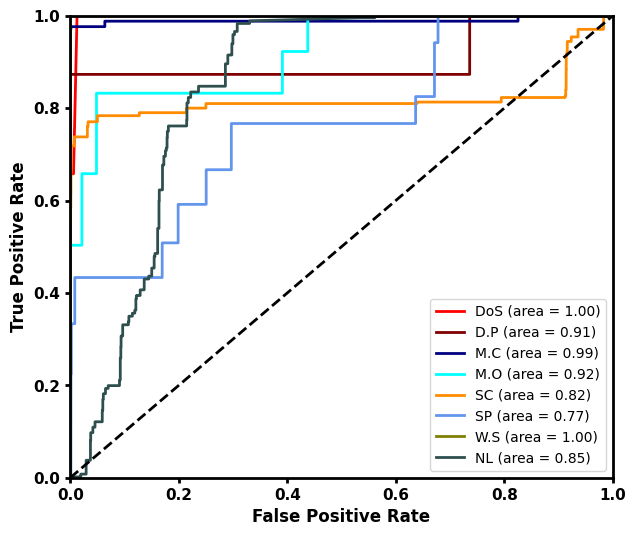

In [54]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_lr[i], tpr_lr[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_lr[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Logistic_Regression")

In [56]:
pipe_tree = pipe_tree.fit(X_train, y_train)

In [57]:
y_score_tree = pipe_tree.predict_proba(X_test)
fpr_tree = dict()
tpr_tree = dict()
roc_auc_tree = dict()
for i in range(n_classes):
    fpr_tree[i], tpr_tree[i], _ = roc_curve(y_test[:, i], y_score_tree[:, i])
    roc_auc_tree[i] = auc(fpr_tree[i], tpr_tree[i])

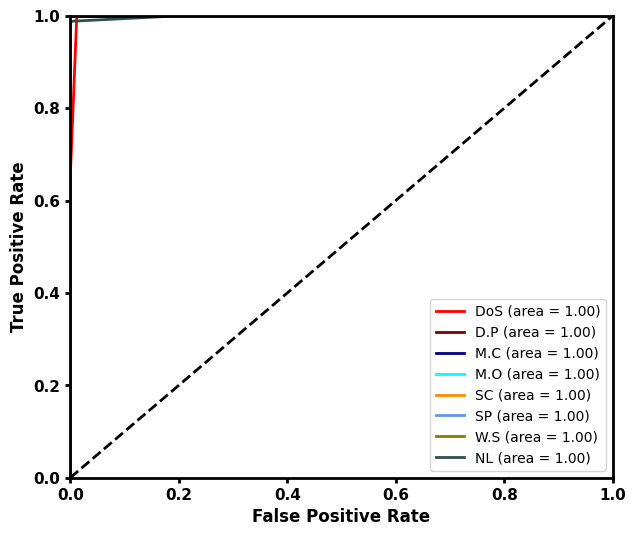

In [58]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_tree[i], tpr_tree[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_tree[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Decision_Tree")

In [59]:
pipe_rnd = pipe_rnd.fit(X_train, y_train)

In [60]:
y_score_rnd = pipe_rnd.predict_proba(X_test)
fpr_rnd = dict()
tpr_rnd = dict()
roc_auc_rnd = dict()
for i in range(n_classes):
    fpr_rnd[i], tpr_rnd[i], _ = roc_curve(y_test[:, i], y_score_rnd[:, i])
    roc_auc_rnd[i] = auc(fpr_rnd[i], tpr_rnd[i])

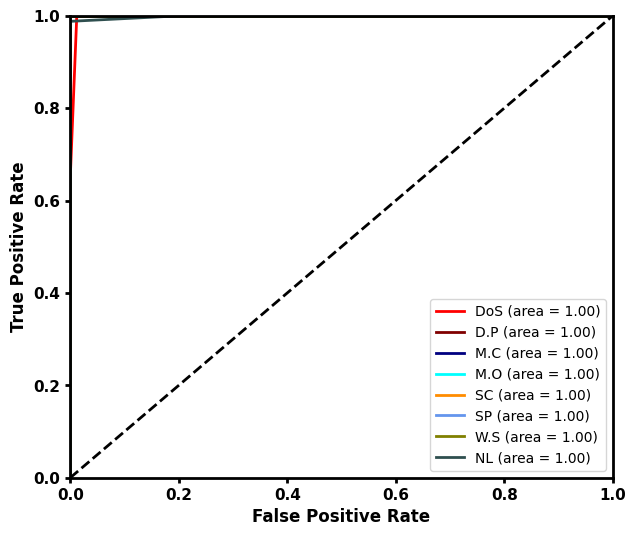

In [61]:
lw = 2
classes = ["DoS","D.P","M.C","M.O","SC","SP","W.S","NL"]
plt.figure(figsize=(7,6))
ax=plt.subplot(111)
colors = cycle(['red','maroon','navy','aqua', 'darkorange', 'cornflowerblue','olive','darkslategray'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr_rnd[i], tpr_rnd[i], color=color, lw=lw,
             label='{0} (area = {1:0.2f})'
             ''.format(classes[i], roc_auc_rnd[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xticks(fontsize=11,weight='bold')
plt.yticks(fontsize=11,weight='bold')
plt.setp(ax.spines.values(), linewidth=2)
ax.xaxis.set_tick_params(width=2)
ax.yaxis.set_tick_params(width=2)
plt.xlabel('False Positive Rate',fontsize=12,weight='bold')
plt.ylabel('True Positive Rate',fontsize=12,weight='bold')
plt.legend(loc="lower right")
plt.savefig("ROC_of_Random_Forrest")